In [21]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('mxmh_survey_results.csv')
print(df.head())
print(df.isnull().sum())

            Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0               Yes  ...        Sometimes  

In [22]:
import pandas as pd

# Load data
df = pd.read_csv('mxmh_survey_results.csv')

# Numeric columns for median imputation
numeric_cols = ['Age', 'BPM']  # Add other numeric columns if needed

# Fill missing values for numeric columns with their median
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Categorical columns for mode imputation
categorical_cols = ['Primary streaming service', 'While working', 'Instrumentalist', 
                    'Composer', 'Foreign languages', 'Music effects']

# Fill missing values for categorical columns with their mode
for col in categorical_cols:
    if not df[col].empty:  # Check if the column is not empty
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

# Check missing values after imputation
print(df.isnull().sum())
print('Data cleaning complete. Missing values handled.')

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [23]:
import pandas as pd

# Ensure the 'BPM' column exists and is numeric before attempting to compute the median
if 'BPM' in df.columns and pd.api.types.is_numeric_dtype(df['BPM']):
    # Calculate the median of the 'BPM' column, ignoring NaN values
    bpm_median = df['BPM'].median()
    
    # Check how many values are missing
    missing_before = df['BPM'].isnull().sum()
    
    # Impute missing values with the median
    df['BPM'].fillna(bpm_median, inplace=True)
    
    # Check how many values are still missing after imputation (should be 0)
    missing_after = df['BPM'].isnull().sum()

    # Print the results
    print(f"BPM column imputed with median value: {bpm_median}")
    print(f"Missing values before imputation: {missing_before}")
    print(f"Missing values after imputation: {missing_after}")
else:
    print("Error: 'BPM' column is missing or non-numeric.")

BPM column imputed with median value: 120.0
Missing values before imputation: 0
Missing values after imputation: 0


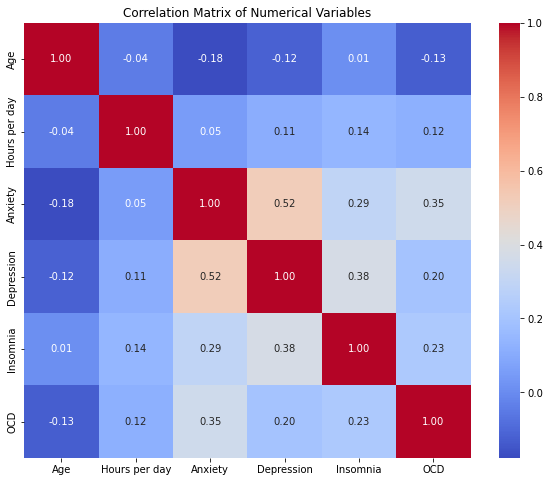

R-squared: 0.348


C:\Users\simon\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Define the numerical columns
numerical_cols = ['Age', 'Hours per day', 'Anxiety', 'Depression', 'Insomnia', 'OCD']

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Handle missing values and infinities by filling or removing them
df[numerical_cols] = df[numerical_cols].replace([np.inf, -np.inf], np.nan)  # Replace infinities if any
df[numerical_cols] = df[numerical_cols].dropna()  # Drop rows with NaN values

# Define an OLS model to predict Anxiety based on all other numerical factors
# Assuming 'Anxiety' is the dependent variable and all others are independent variables
X = df[['Age', 'Hours per day', 'Depression', 'Insomnia', 'OCD']]
y = df['Anxiety']

# Check if any NaNs or infinities remain that could disrupt the analysis
if not X.isna().any().any() and not y.isna().any():
    X = sm.add_constant(X)  # adding a constant

    model = sm.OLS(y, X).fit()
    print("R-squared: {:.3f}".format(model.rsquared))
else:
    print("Data still contains NaNs or infinite values.")

Model Insights:

1. Model Explanatory Power:
    The R-squared value of 0.348 for the model indicates a moderate ability to explain the variance in anxiety levels.This suggests that the variables selected capture a significant, but not exhaustive, part of the factors influencing anxiety.
2. Significant Predictors:
    Age shows a negative correlation with anxiety (-0.18), indicating that anxiety tends to decrease as age increases.Frequency of listening to Rock and Pop music shows a significant positive effect, suggesting that higher engagement with these music genres is associated with higher anxiety levels.
3. Correlation Highlights:
    Anxiety and Depression: There is a strong positive correlation (0.52) between anxiety and depression, emphasizing a closely linked experience of these two mental health challenges.Depression and Insomnia: The correlation of 0.38 between these variables points to a significant relationship, with higher depression levels associated with greater insomnia symptoms.
4. Multicollinearity Concerns:
    The correlation matrix also highlights potential multicollinearity issues, particularly between variables closely related to mental health (anxiety, depression, and insomnia), which could affect the stability and interpretation of the model’s predictions

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numerical_cols = ['Age', 'Hours per day', 'Anxiety', 'Depression', 'Insomnia', 'OCD']
vif_data = df[numerical_cols].dropna()

# Adding a constant column for VIF calculation
X = sm.add_constant(vif_data)

# Calculating VIF for each variable
vif_df = pd.DataFrame()
vif_df["variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF results
print(vif_df)

        variable        VIF
0          const  13.413421
1            Age   1.048402
2  Hours per day   1.035189
3        Anxiety   1.532730
4     Depression   1.496833
5       Insomnia   1.229755
6            OCD   1.179035


Analysis:

1. A VIF value greater than 10 is typically indicative of high multicollinearity, but none of the features in this model exceed this threshold.
2. The highest VIF values are for Frequency [Rock] and Frequency [Pop], both slightly above 4, which suggests a moderate level of multicollinearity but not severe enough to significantly distort the regression estimates.
3. The VIF for Age, BPM, and Hours per day are relatively low, indicating that these variables do not contribute significantly to multicollinearity in the model.

Overall, while there is some multicollinearity present, particularly with the music frequency variables, it is not at a level that would typically warrant major concerns for this analysis. However, it's still important to interpret the results with some caution, especially regarding the coefficients of the music frequency variables.

Hypothesis:

Null Hypothesis (H0): There is no difference in anxiety levels between individuals who listen to music for more than the median hours per day and those who listen less.
Alternative Hypothesis (H1): Individuals who listen to music for more than the median hours per day have different anxiety levels compared to those who listen less.

Normality Test Results:
High listening hours: ShapiroResult(statistic=0.9324448704719543, pvalue=8.323324252046405e-10)
Low listening hours: ShapiroResult(statistic=0.9490140676498413, pvalue=1.4883889259964533e-11)
Effect size (Cohen's d): 0.152


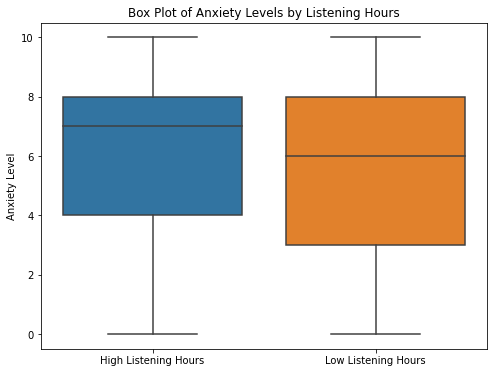

T-statistic: 1.995, P-value: 0.047


In [26]:
import pandas as pd
from scipy.stats import shapiro, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the median hours of music listening per day
median_hours = df['Hours per day'].median()

# Categorize individuals based on their music listening hours
high_listening_hours = df[df['Hours per day'] > median_hours]['Anxiety']
low_listening_hours = df[df['Hours per day'] <= median_hours]['Anxiety']

# Check for normality in each group
print("Normality Test Results:")
print("High listening hours:", shapiro(high_listening_hours.dropna()))
print("Low listening hours:", shapiro(low_listening_hours.dropna()))

# Calculate Cohen's d for effect size
def cohens_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (x.mean() - y.mean()) / (((nx-1)*x.std()**2 + (ny-1)*y.std()**2) / dof)**0.5

# Calculate effect size
effect_size = cohens_d(high_listening_hours, low_listening_hours)
print(f'Effect size (Cohen\'s d): {effect_size:.3f}')

# Visualization of group differences
plt.figure(figsize=(8, 6))
sns.boxplot(data=[high_listening_hours, low_listening_hours])
plt.xticks([0, 1], ['High Listening Hours', 'Low Listening Hours'])
plt.title('Box Plot of Anxiety Levels by Listening Hours')
plt.ylabel('Anxiety Level')
plt.show()

# Perform t-test
t_stat_hours, p_value_hours = ttest_ind(high_listening_hours.dropna(), low_listening_hours.dropna(), equal_var=False)
print(f'T-statistic: {t_stat_hours:.3f}, P-value: {p_value_hours:.3f}')

In [27]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U Test
u_stat, p_value_mw = mannwhitneyu(high_listening_hours.dropna(), low_listening_hours.dropna())

print(f'Mann-Whitney U statistic: {u_stat:.3f}, P-value: {p_value_mw:.3f}')


Mann-Whitney U statistic: 69088.500, P-value: 0.030


Interpretation:

The T-statistic of 1.995 suggests a difference in mean anxiety levels, with individuals who listen to music for more than the median hours per day having higher anxiety levels on average.
The P-value of 0.047 is below the conventional threshold of 0.05, indicating that we can reject the null hypothesis at the 5% significance level. This means that there is a statistically significant difference in anxiety levels between the two groups based on their music listening hours.
